# Explore latent

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
from config import *
from model import LofiModel
from dataset_finetuning import MidiDataset, prepare_dataloaders
from utils import explore_latent_space, visualize_latent_space, tensor_to_midi
import os

In [2]:
model = LofiModel()
model.load_weights(fr"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\finetuned_lofi_model\lofi_model_epoch_50.pth")
print(model)

Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\finetuned_lofi_model\lofi_model_epoch_50.pth
LofiModel(
  (encoder): Encoder(
    (input_projection): Linear(in_features=128, out_features=128, bias=True)
    (lstm): LSTM(128, 512, num_layers=2, batch_first=True, bidirectional=True)
    (fc_mu): Linear(in_features=1024, out_features=512, bias=True)
    (fc_logvar): Linear(in_features=1024, out_features=512, bias=True)
  )
  (decoder): HierarchicalDecoder(
    (z_to_conductor_initial): Linear(in_features=512, out_features=2048, bias=True)
    (conductor): LSTM(1, 512, num_layers=2, batch_first=True)
    (conductor_to_decoder_initial): Linear(in_features=512, out_features=2048, bias=True)
    (decoder_rnn): LSTM(1, 512, num_layers=2, batch_first=True)
    (output_projection): Linear(in_features=512, out_features=384, bias=True)
  )
)


In [3]:
train_dataloader, val_dataloader = prepare_dataloaders()

Loading dataset for fine-tuning...
Found 9274 MIDI files.
Processing MIDI files, normalizing tempo, and extracting segments...


Processing files: 100%|██████████| 9274/9274 [00:07<00:00, 1229.66it/s]

Successfully extracted 7559 segments from 9274 files.
Splitting dataset...
Dataset split into: Train=6425, Validation=1134
Finished preparing dataset for fine-tuning.




--- Visualising latent space


Encoding samples: 100%|██████████| 36/36 [00:00<00:00, 56.70it/s]


Performing PCA on the latent space...
Saving plot to: visualizations\latent_space.png



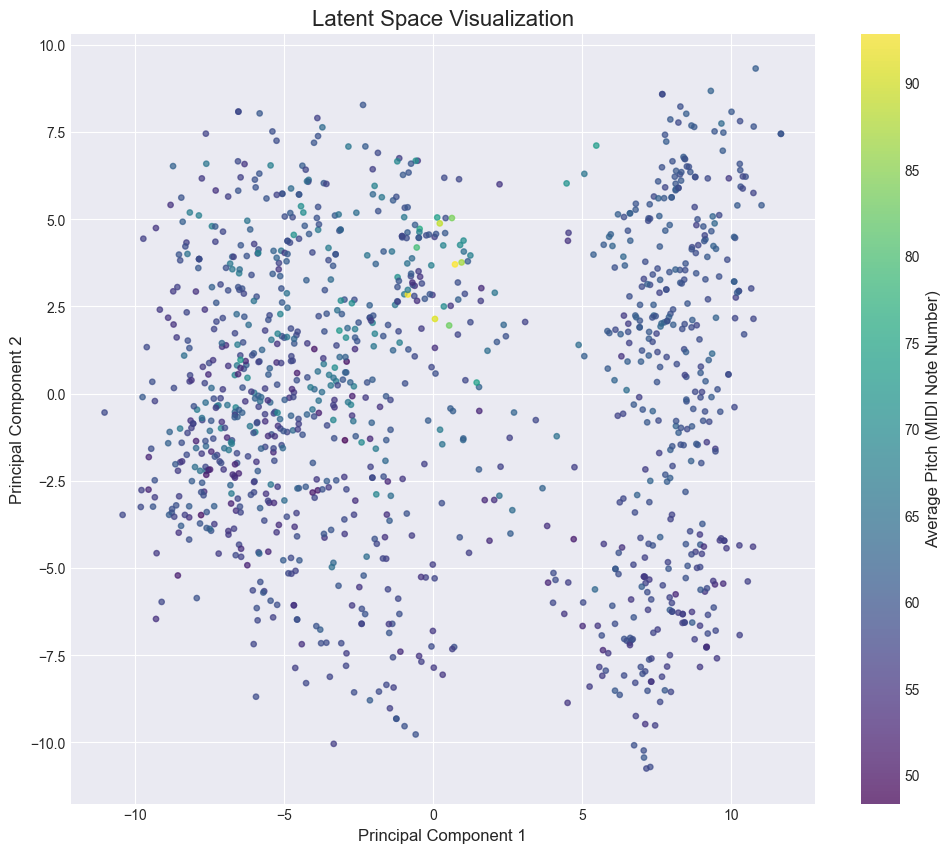

In [5]:
pca, z_2d = visualize_latent_space(model, val_dataloader)

In [8]:
points_to_explore = [
    [-2,-6],[-2,-4],[-2, -3.75], [-2, 3.7],
    
    # --- Eksploracja osi wysokości dźwięku (oś Y) ---
    # Zaczynamy od bardzo wysokich rejestrów (lewy górny róg)
    [-10, 20],
    # Schodzimy niżej
    [-5, 10],
    # Punkt centralny
    [0, 0],
    # Wchodzimy w niskie rejestry
    [10, -10],
    # Bardzo niskie rejestry (prawy dolny róg)
    [15, -12],
    
    # --- Eksploracja "tajemniczej" osi X (przy stałej wysokości dźwięku) ---
    # Zobaczymy, jak zmienia się charakter muzyki, poruszając się w poziomie
    [-15, 5], # Daleko na lewo
    [-5, 5],
    [5, 5],
    [15, 5],  # Daleko na prawo
    
    # --- Badanie "narożników" przestrzeni ---
    # Sprawdźmy, jakie "ekstremalne" próbki potrafi wygenerować model
    [18, 10],   # Prawy-górny róg
    [-15, -10],  # Lewy-dolny róg

    # --- Ścisłe centrum ---
    [0, 0],         # Absolutne centrum, najbardziej "uśredniona" próbka.
    [-2.5, -3.5],   # Punkt w sercu najgęstszego, niebiesko-zielonego obszaru.
    [2.5, 2.5],     # Punkt w gęstym, zielonym obszarze.

    # --- Eksploracja wokół centrum ---
    [5, -5],        # Dolna-prawa część centralnej chmury.
    [-5, 8],        # Górna-lewa część centralnej chmury (wyższe dźwięki).
    [8, 0],         # Prawa strona chmury na osi X.
    [-8, 0],        # Lewa strona chmury na osi X.
]


-- Latent Space Explorer ---
Generating sample from point (-2, -6)...


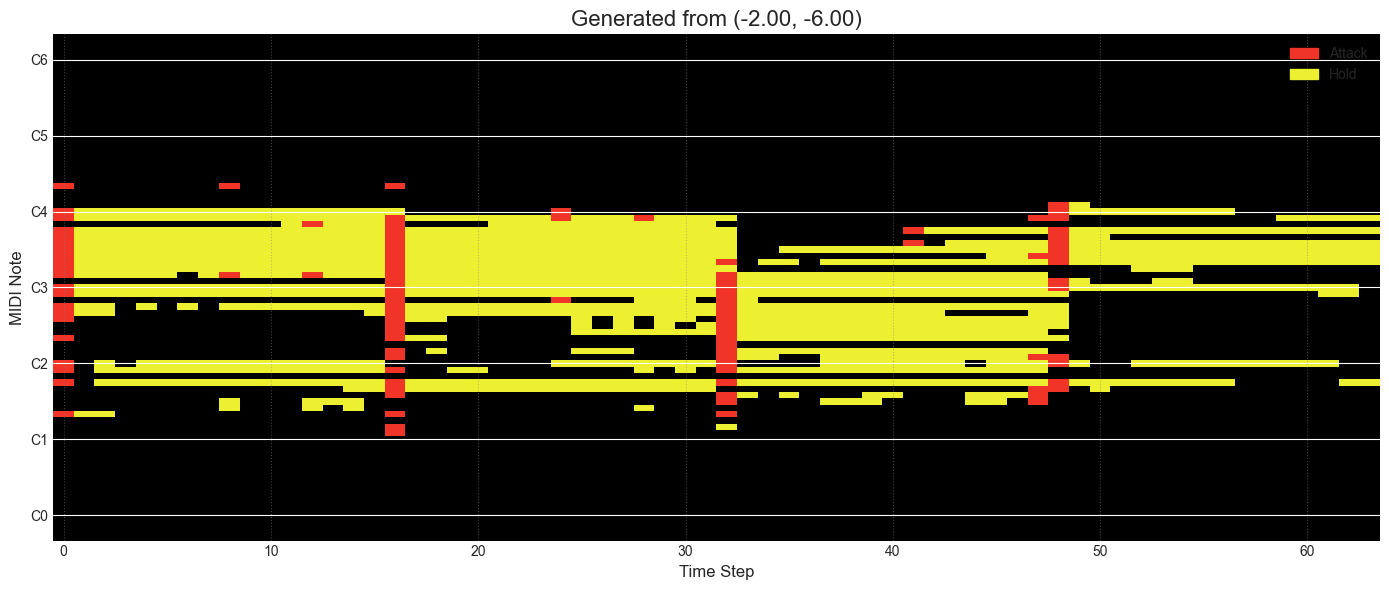

Converting tensor to MIDI file at generated_explorations\sample_x-2.00_y-6.00.mid...
MIDI file saved successfully.
Generating sample from point (-2, -4)...


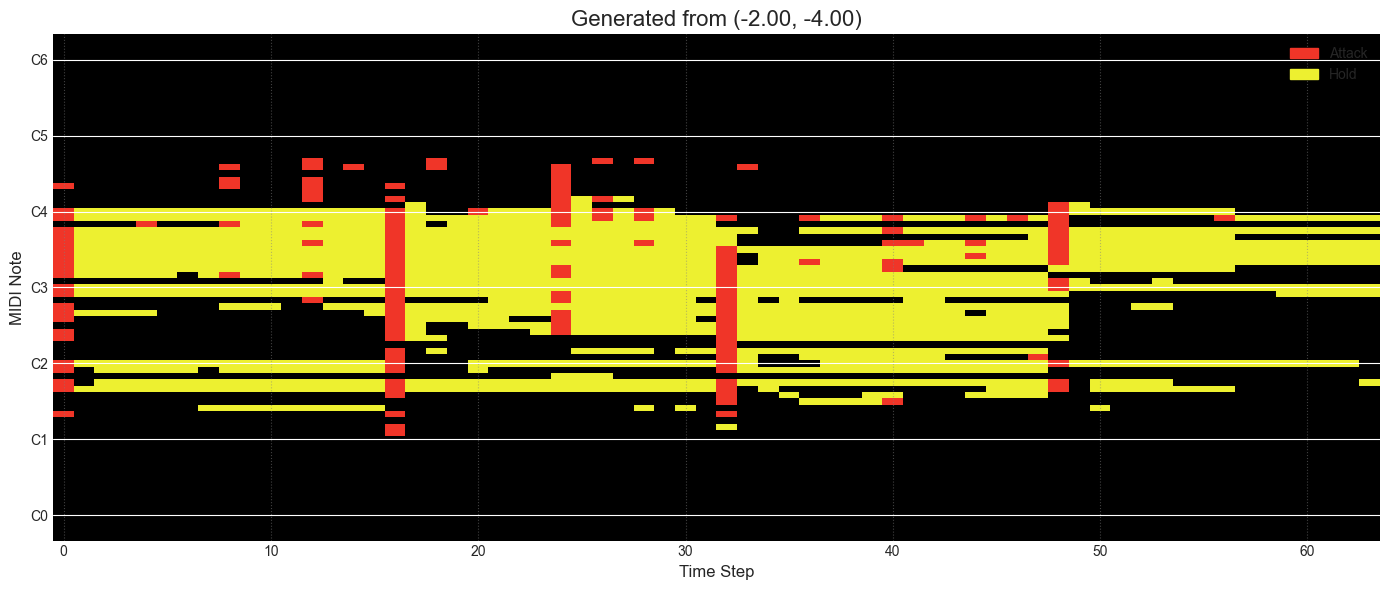

Converting tensor to MIDI file at generated_explorations\sample_x-2.00_y-4.00.mid...
MIDI file saved successfully.
Generating sample from point (-2, -3.75)...


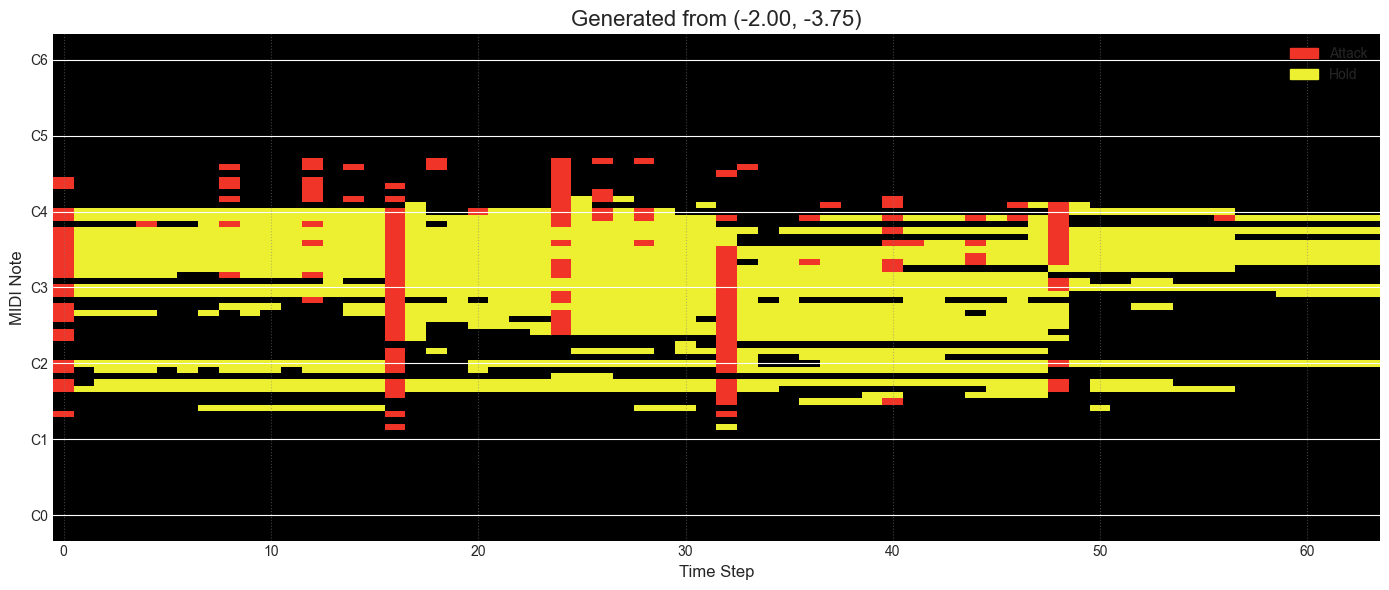

Converting tensor to MIDI file at generated_explorations\sample_x-2.00_y-3.75.mid...
MIDI file saved successfully.
Generating sample from point (-2, 3.7)...


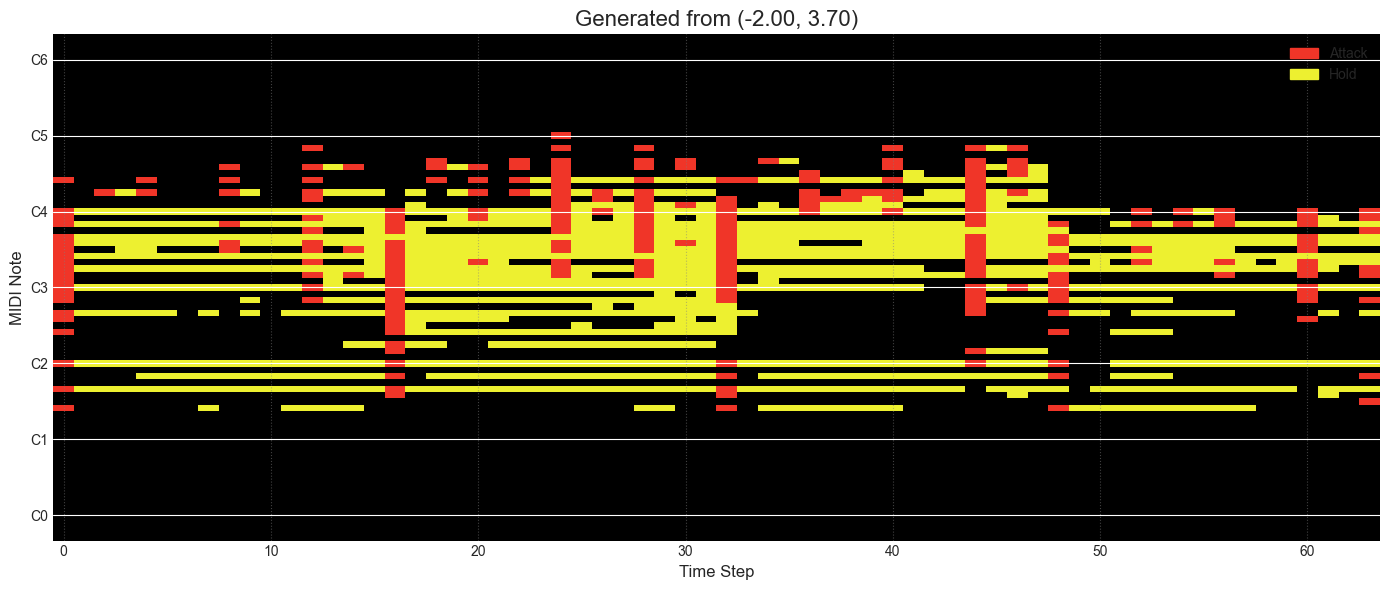

Converting tensor to MIDI file at generated_explorations\sample_x-2.00_y3.70.mid...
MIDI file saved successfully.
Generating sample from point (-10, 20)...


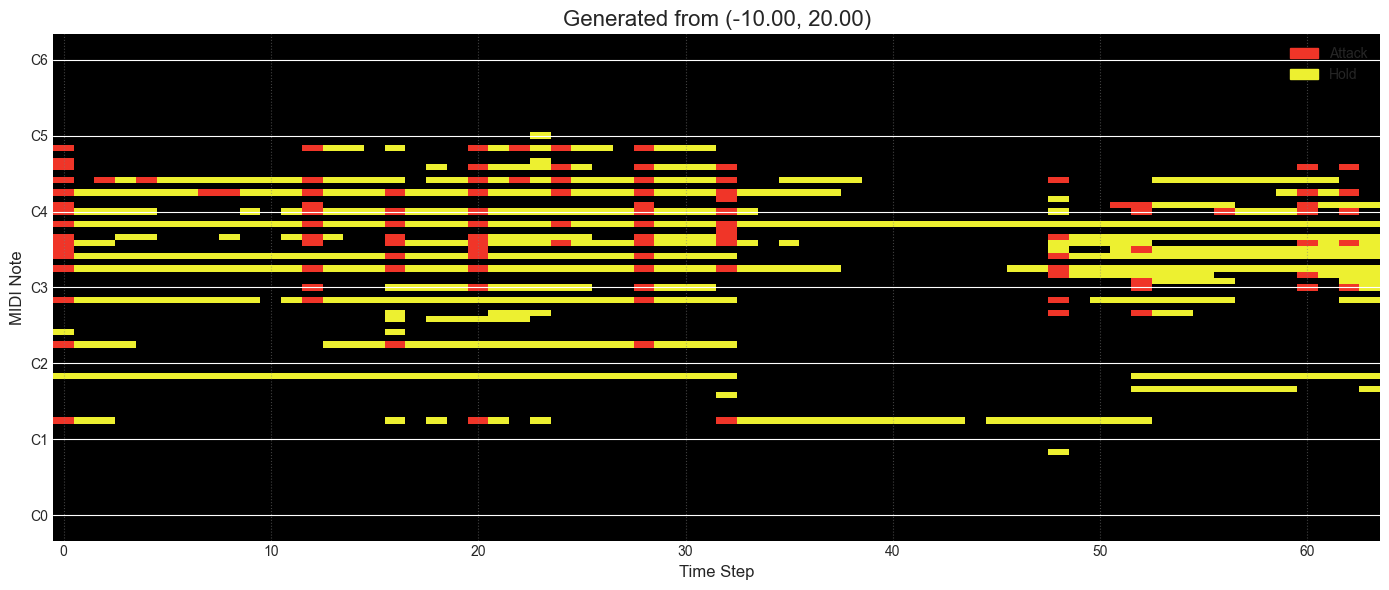

Converting tensor to MIDI file at generated_explorations\sample_x-10.00_y20.00.mid...
MIDI file saved successfully.
Generating sample from point (-5, 10)...


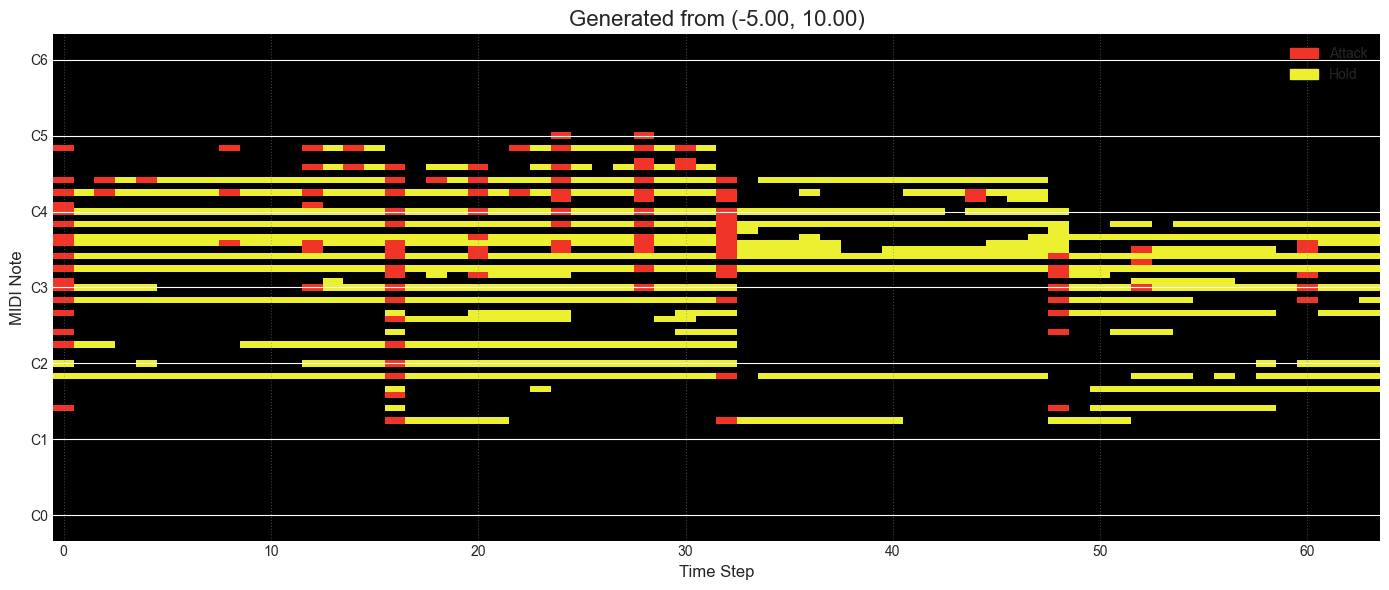

Converting tensor to MIDI file at generated_explorations\sample_x-5.00_y10.00.mid...
MIDI file saved successfully.
Generating sample from point (0, 0)...


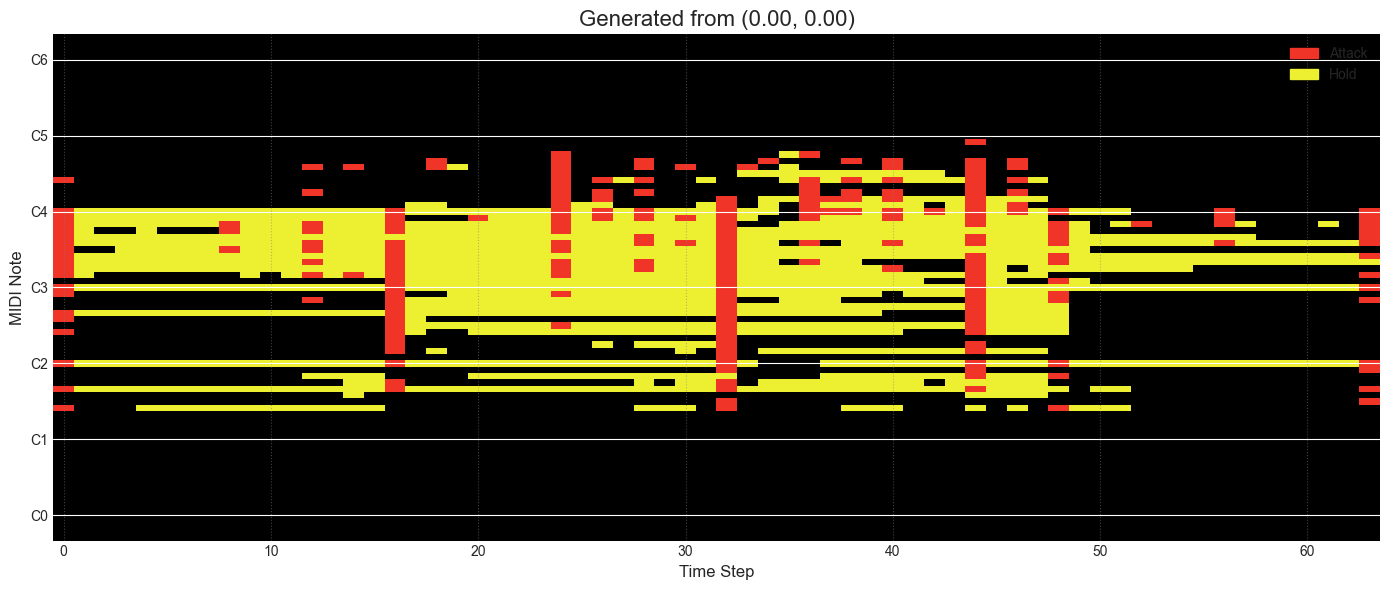

Converting tensor to MIDI file at generated_explorations\sample_x0.00_y0.00.mid...
MIDI file saved successfully.
Generating sample from point (10, -10)...


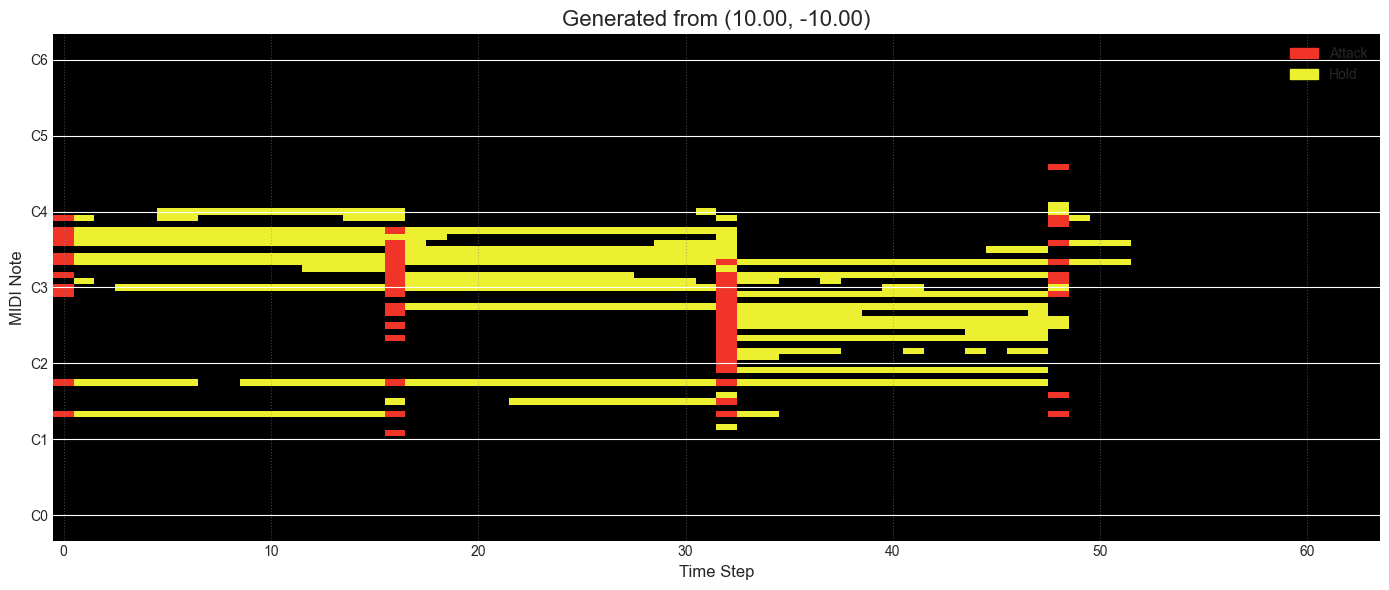

Converting tensor to MIDI file at generated_explorations\sample_x10.00_y-10.00.mid...
MIDI file saved successfully.
Generating sample from point (15, -12)...


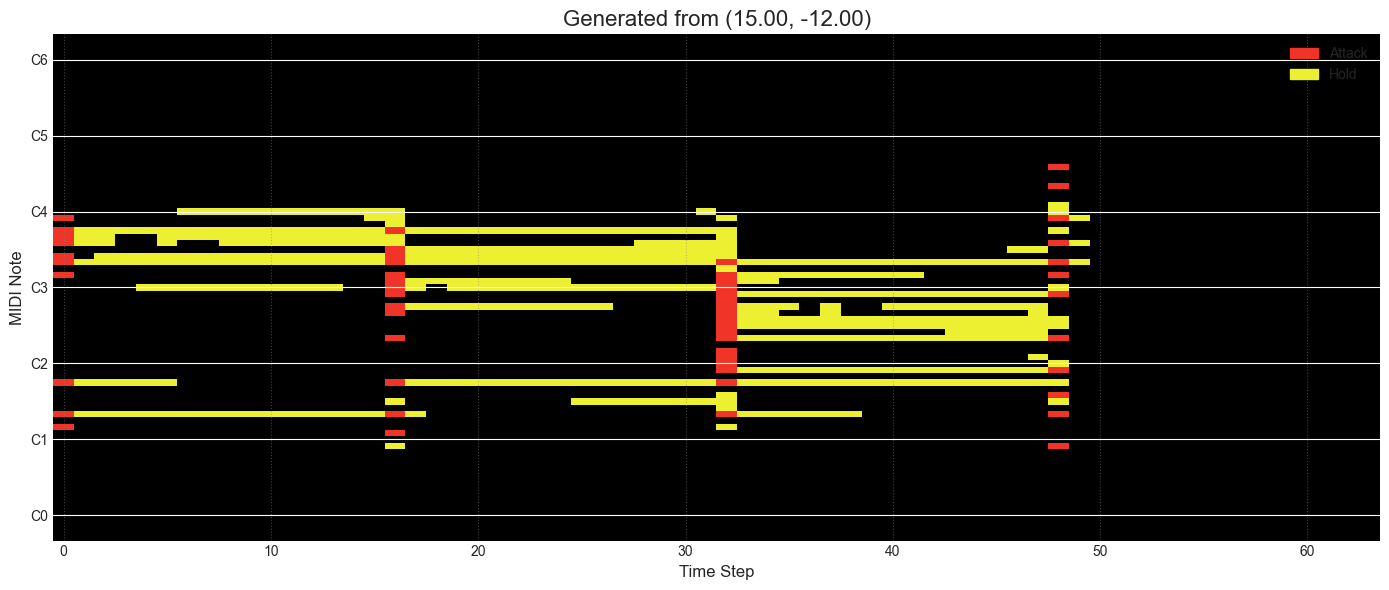

Converting tensor to MIDI file at generated_explorations\sample_x15.00_y-12.00.mid...
MIDI file saved successfully.
Generating sample from point (-15, 5)...


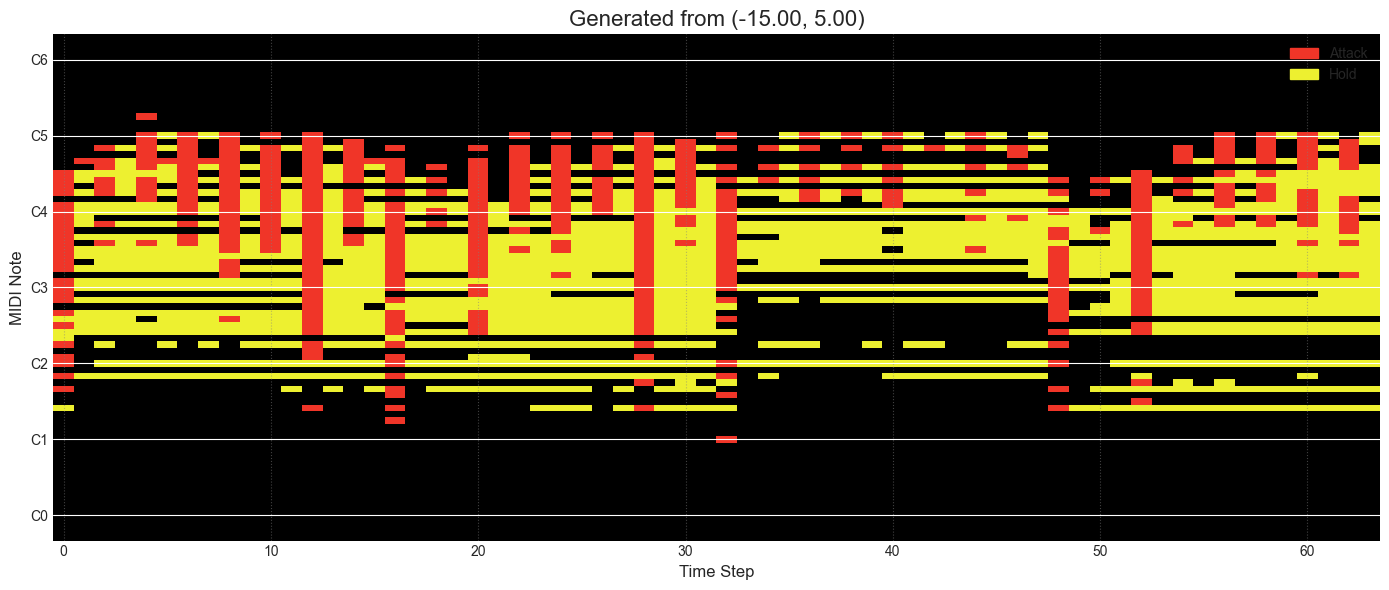

Converting tensor to MIDI file at generated_explorations\sample_x-15.00_y5.00.mid...
MIDI file saved successfully.
Generating sample from point (-5, 5)...


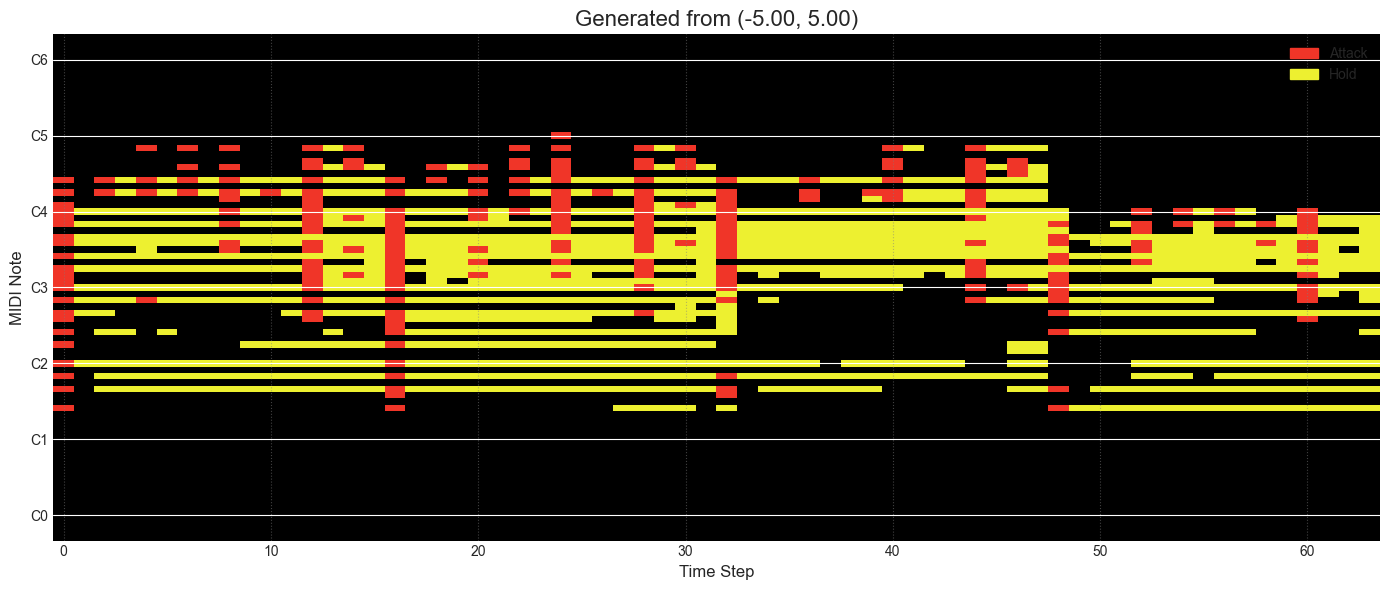

Converting tensor to MIDI file at generated_explorations\sample_x-5.00_y5.00.mid...
MIDI file saved successfully.
Generating sample from point (5, 5)...


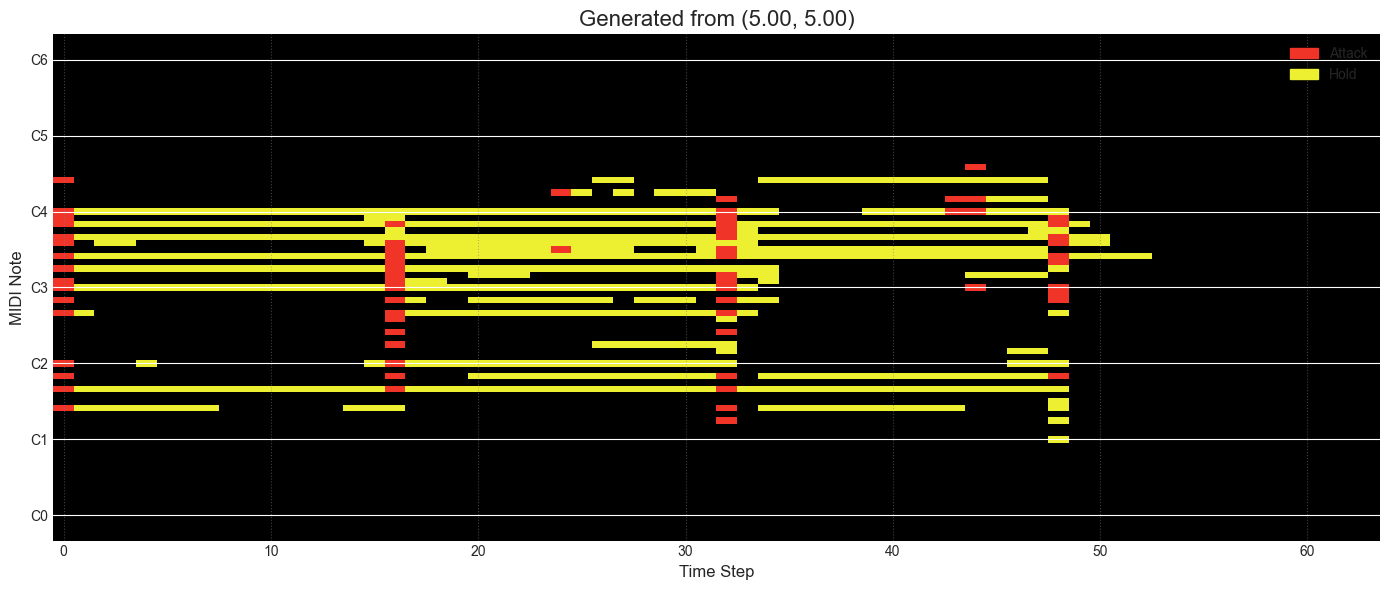

Converting tensor to MIDI file at generated_explorations\sample_x5.00_y5.00.mid...
MIDI file saved successfully.
Generating sample from point (15, 5)...


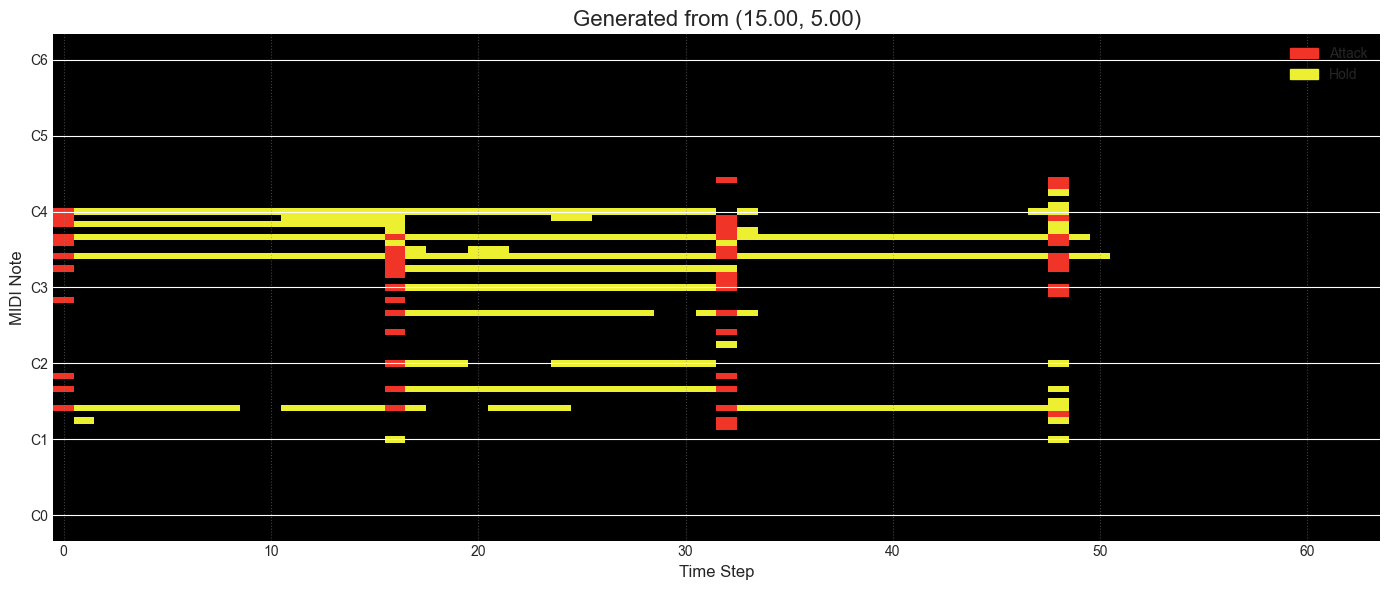

Converting tensor to MIDI file at generated_explorations\sample_x15.00_y5.00.mid...
MIDI file saved successfully.
Generating sample from point (18, 10)...


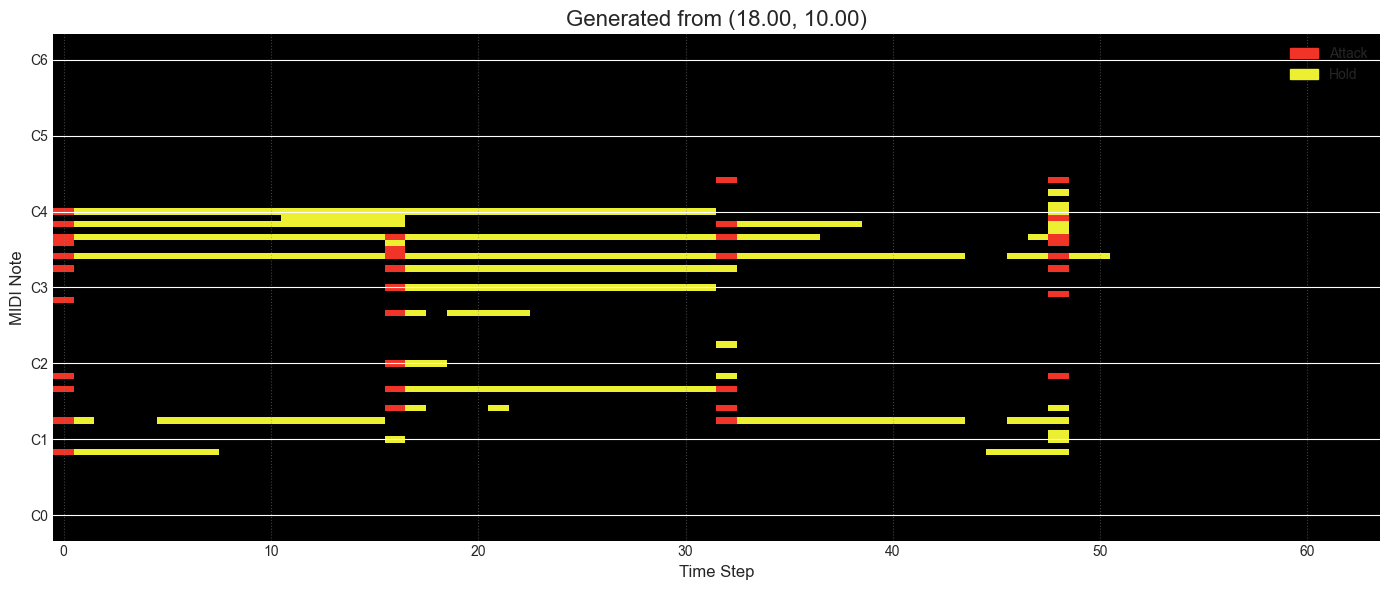

Converting tensor to MIDI file at generated_explorations\sample_x18.00_y10.00.mid...
MIDI file saved successfully.
Generating sample from point (-15, -10)...


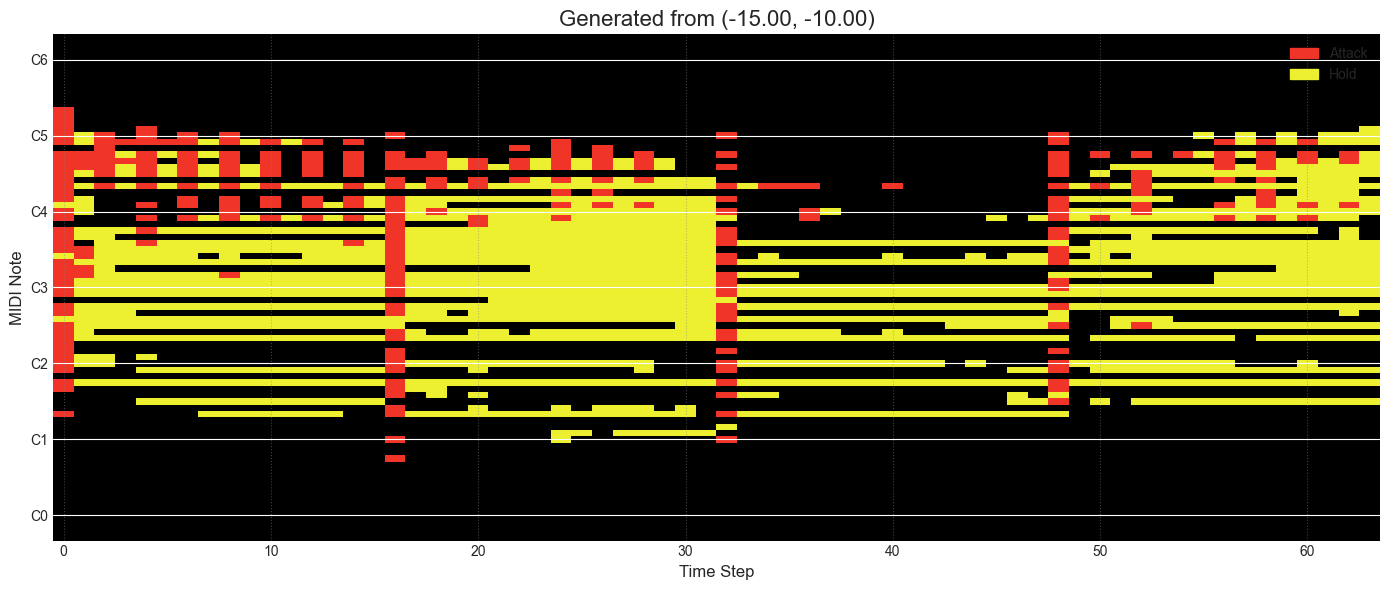

Converting tensor to MIDI file at generated_explorations\sample_x-15.00_y-10.00.mid...
MIDI file saved successfully.
Generating sample from point (0, 0)...


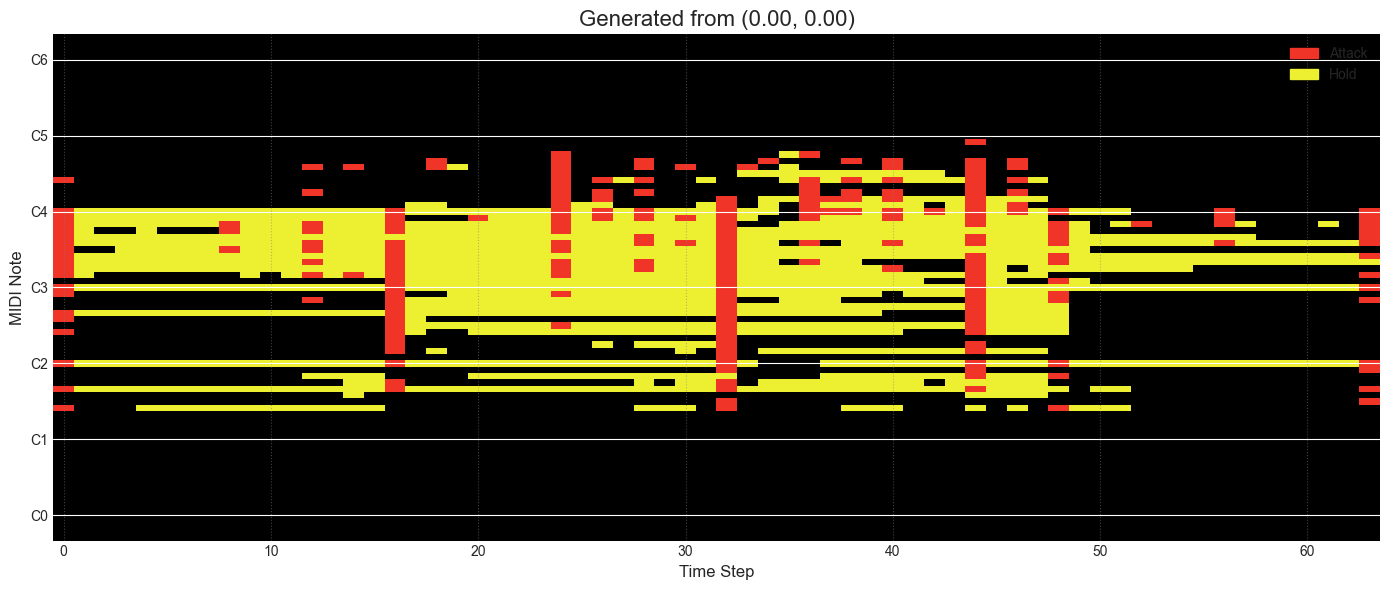

Converting tensor to MIDI file at generated_explorations\sample_x0.00_y0.00.mid...
MIDI file saved successfully.
Generating sample from point (-2.5, -3.5)...


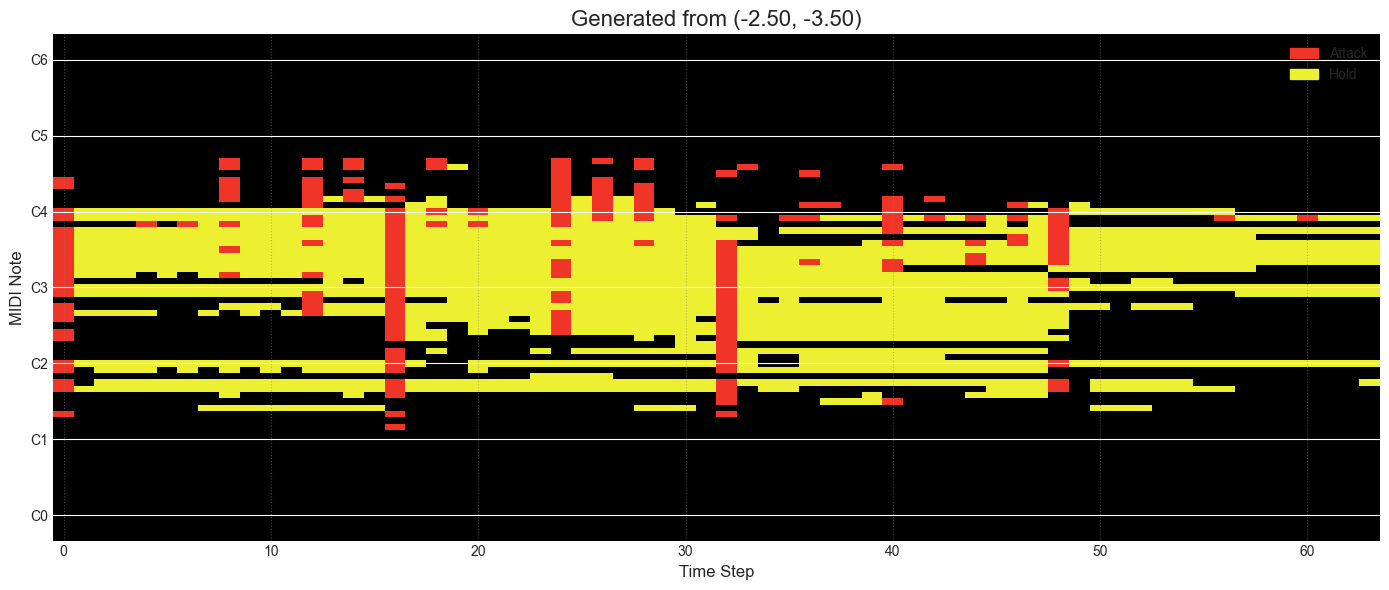

Converting tensor to MIDI file at generated_explorations\sample_x-2.50_y-3.50.mid...
MIDI file saved successfully.
Generating sample from point (2.5, 2.5)...


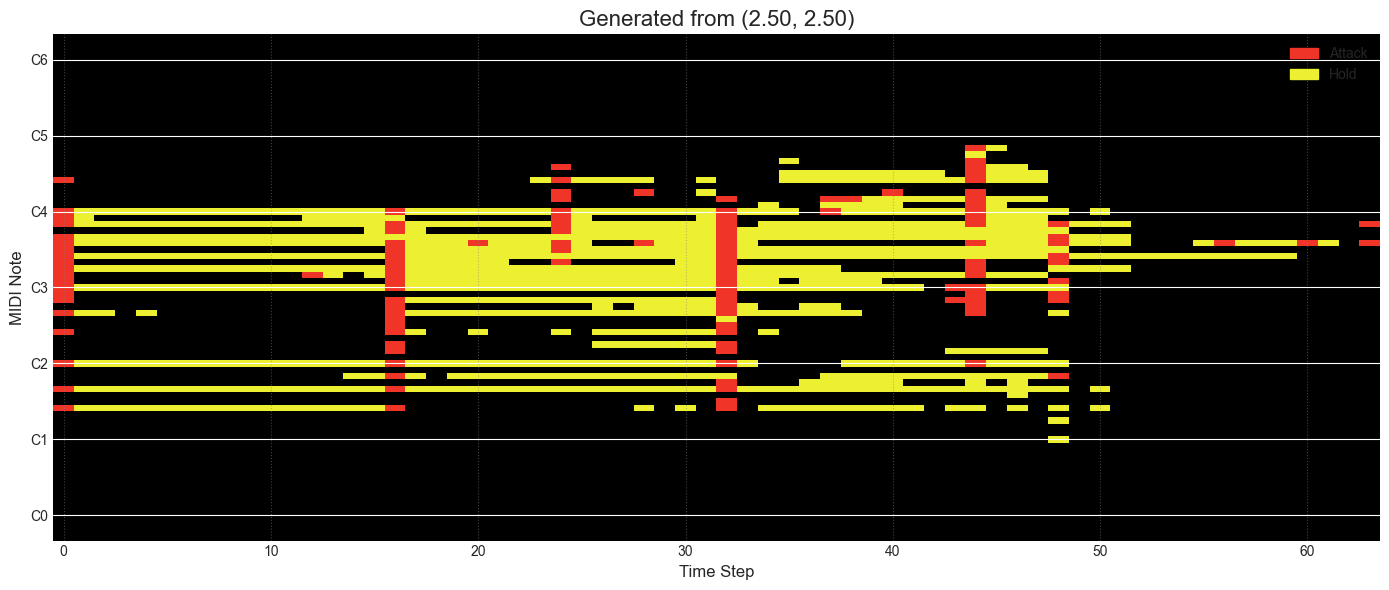

Converting tensor to MIDI file at generated_explorations\sample_x2.50_y2.50.mid...
MIDI file saved successfully.
Generating sample from point (5, -5)...


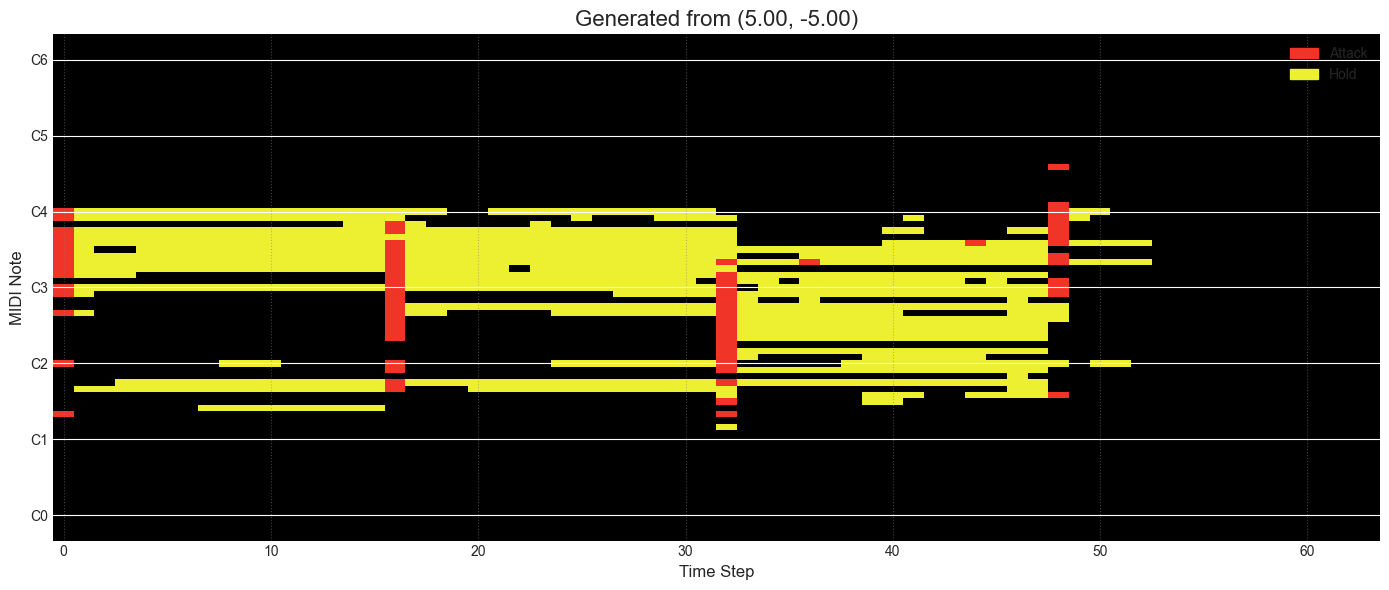

Converting tensor to MIDI file at generated_explorations\sample_x5.00_y-5.00.mid...
MIDI file saved successfully.
Generating sample from point (-5, 8)...


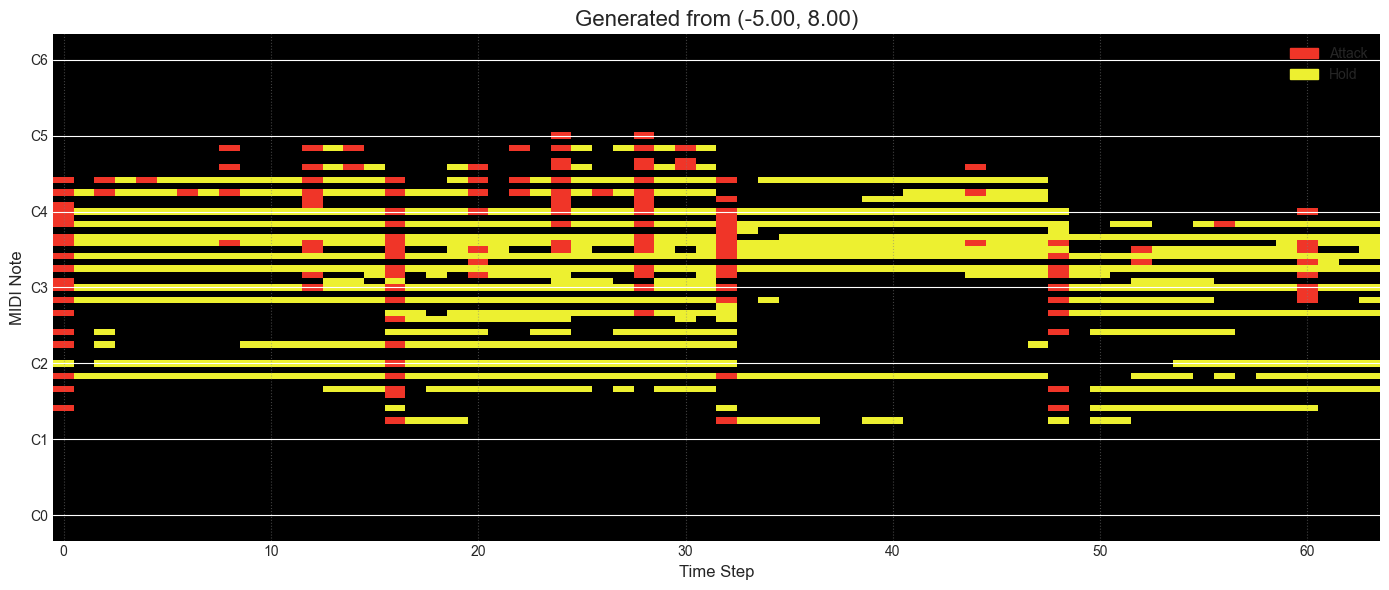

Converting tensor to MIDI file at generated_explorations\sample_x-5.00_y8.00.mid...
MIDI file saved successfully.
Generating sample from point (8, 0)...


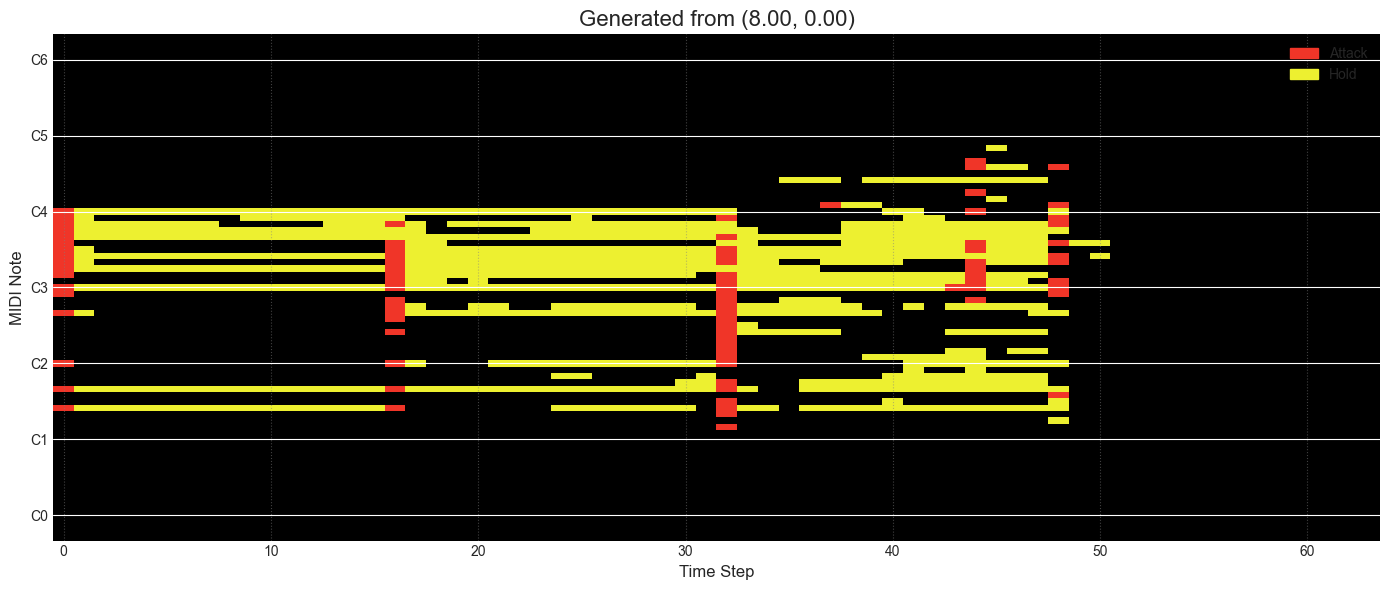

Converting tensor to MIDI file at generated_explorations\sample_x8.00_y0.00.mid...
MIDI file saved successfully.
Generating sample from point (-8, 0)...


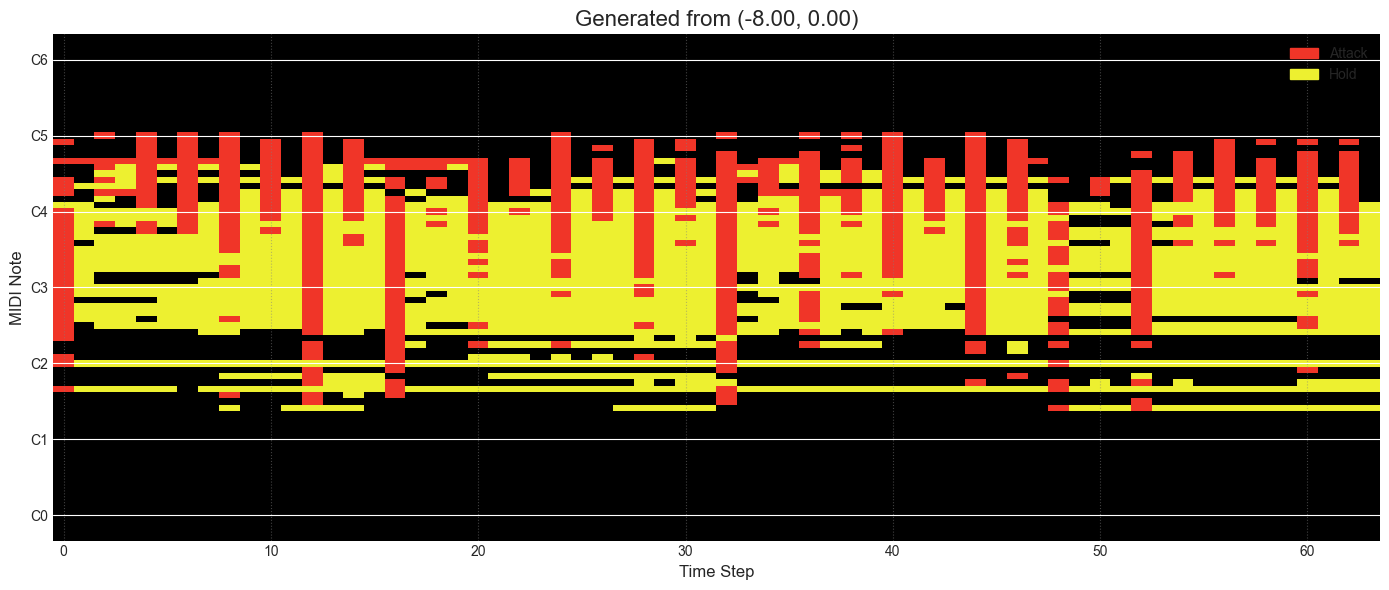

Converting tensor to MIDI file at generated_explorations\sample_x-8.00_y0.00.mid...
MIDI file saved successfully.


In [9]:
# --- 3. Interactive Exploration Loop ---
print("-- Latent Space Explorer ---")
            
for x, y in points_to_explore:
    print(f"Generating sample from point ({x}, {y})...")
    # --- 4. Inverse Transform and Generation ---
    with torch.no_grad():

        # Create a 2D point and reshape it for the inverse transform
        point_2d = np.array([[x, y]])
        
        # Use the fitted PCA object to transform the 2D point back to the high-dimensional space
        point_high_dim = pca.inverse_transform(point_2d)
        
        # Convert to a PyTorch tensor and move to the correct device
        z_vector = torch.from_numpy(point_high_dim).float().to(model.device)
        
        # Generate a piano roll using only the decoder
        generated_pianoroll = model.decoder(z_vector)
        final_pianoroll = torch.argmax(generated_pianoroll, dim=-1).squeeze(0)
    
    # Visualize the generated piano roll
    MidiDataset.visualize(final_pianoroll.cpu(), title=f"Generated from ({x:.2f}, {y:.2f})")
    
    # Save the generated sample to a MIDI file
    output_dir = "generated_explorations"
    output_path = os.path.join(output_dir, f"sample_x{x:.2f}_y{y:.2f}.mid")
    tensor_to_midi(final_pianoroll, output_path, bpm=100)